In [62]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
%matplotlib inline


from sklearn.model_selection import train_test_split,KFold,cross_val_score,ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')


# Introduction
Most of you may not be familiar with Hong Kong horse racing (or even horse racing). In order to help you get started playing with the dataset, I will try to explain a little bit more about Hong Kong horse racing based on the data we have.

First, we'll load the dataset.

In [3]:
df = pd.read_csv('race-result-horse.csv')
df.head()

,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,running_position_1,running_position_2,running_position_3,running_position_4,finish_time,win_odds,running_position_5,running_position_6,race_id
0,1,1.0,DOUBLE DRAGON,K019,B Prebble,D Cruz,133,1032,1,-,1.0,2.0,2.0,1.0,1.22.33,3.8,NaN,NaN,2014-001
1,2,2.0,PLAIN BLUE BANNER,S070,D Whyte,D E Ferraris,133,1075,13,2,8.0,9.0,9.0,2.0,1.22.65,8,NaN,NaN,2014-001
2,3,10.0,GOLDWEAVER,P072,Y T Cheng,Y S Tsui,121,1065,3,2,2.0,1.0,1.0,3.0,1.22.66,5.7,NaN,NaN,2014-001
3,4,3.0,SUPREME PROFIT,P230,J Moreira,C S Shum,132,1222,2,2,6.0,4.0,5.0,4.0,1.22.66,6.1,NaN,NaN,2014-001
4,5,7.0,THE ONLY KID,H173,Z Purton,K W Lui,125,1136,9,4-1/4,9.0,10.0,10.0,5.0,1.23.02,6.1,NaN,NaN,2014-001


# About the Features

**finishing_position-** The final position, between 1-14 (Depends on the number of horses in the race)

**horse_number-** The number of the horse, also between 1-14. As explained below, is influenced by the rider's weight.         

**horse_name               
horse_id**

**jockey-** the name of the rider.

**trainer-** the name of of the trainer.

**actual_weight-** the weight of the jokey (effect the horse number).            

**declared_horse_weight**

**draw-** the number of the gate, also between 1-14 (effect the wins odd- Will be explained later)                     

**length_behind_winner     
running_position_1       
running_position_2       
running_position_3       
running_position_4       
finish_time**

**win_odds-** Ranging from 1 to 99, with the odds represented for gambling calculations. As will be explained below, the first gate is closer to the finish line, so the chances of winning are higher. As a result, those who bet on the horse at the first gate will earn less profits and thus the odds presented for them will be lower.

**running_position_5       
running_position_6       
race_id**                

# Data Cleaning
**First we cleaned the data a bit and filled nan values or other wrong values**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30189 entries, 0 to 30188
Data columns (total 19 columns):
finishing_position       30187 non-null object
horse_number             29851 non-null float64
horse_name               30189 non-null object
horse_id                 30189 non-null object
jockey                   30189 non-null object
trainer                  30189 non-null object
actual_weight            30189 non-null object
declared_horse_weight    30189 non-null object
draw                     30189 non-null object
length_behind_winner     30189 non-null object
running_position_1       29574 non-null float64
running_position_2       29560 non-null float64
running_position_3       29542 non-null float64
running_position_4       16618 non-null float64
finish_time              30189 non-null object
win_odds                 30189 non-null object
running_position_5       3764 non-null float64
running_position_6       549 non-null float64
race_id                  30189 non-null o

In [5]:
df['finishing_position'].unique()#Example of incorrect values

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', 'WV-A', '14', 'WV', '9 DH', '2 DH', 'WX', 'PU', '1 DH',
       '8 DH', 'UR', 'FE', '4 DH', '10 DH', 'TNP', '5 DH', 'DISQ',
       '11 DH', '12 DH', '3 DH', '7 DH', 'WX-A', 'DNF', '6 DH', nan],
      dtype=object)

In [6]:
df=df.drop(columns=['running_position_6', 'running_position_5','running_position_4'])# more than half was nan 

df['finishing_position']= df['finishing_position'].replace(['WV-A', 'WV', '9 DH', '2 DH', 'WX', 'PU', '1 DH',
       '8 DH', 'UR', 'FE', '4 DH', '10 DH', 'TNP', '5 DH', 'DISQ',
       '11 DH', '12 DH', '3 DH', '7 DH', 'WX-A', 'DNF', '6 DH'], np.nan)
df['finishing_position']=pd.to_numeric(df['finishing_position'], downcast='signed')
df['finishing_position']=df['finishing_position'].interpolate().astype('int32')
df['horse_number']=df['horse_number'].interpolate().astype('int32')

df['running_position_1']=df['running_position_1'].interpolate().astype('int32')
df['running_position_2']=df['running_position_2'].interpolate().astype('int32')
df['running_position_3']=df['running_position_3'].interpolate().astype('int32')

df['win_odds']= df['win_odds'].replace('---',np.nan)
df['win_odds']=pd.to_numeric(df['win_odds'], downcast='signed')
df['win_odds']=df['win_odds'].fillna(df['win_odds'].mean())

df['declared_horse_weight']= df['declared_horse_weight'].replace('-',np.nan)
df['declared_horse_weight']=pd.to_numeric(df['declared_horse_weight'], downcast='signed')
df['declared_horse_weight']=df['declared_horse_weight'].fillna(df['declared_horse_weight'].mean())


df['draw']= df['draw'].replace('---',np.nan)
df['draw']=pd.to_numeric(df['draw'], downcast='signed')
df['draw']=df['draw'].interpolate().astype('int32')

df['actual_weight']= df['actual_weight'].replace('-',np.nan)
df['actual_weight']=pd.to_numeric(df['actual_weight'], downcast='signed')
df['actual_weight']=df['actual_weight'].fillna(df['actual_weight'].mean())


In [7]:
df.info()#We now have a clean and ready data for explanations and analyzes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30189 entries, 0 to 30188
Data columns (total 16 columns):
finishing_position       30189 non-null int32
horse_number             30189 non-null int32
horse_name               30189 non-null object
horse_id                 30189 non-null object
jockey                   30189 non-null object
trainer                  30189 non-null object
actual_weight            30189 non-null float64
declared_horse_weight    30189 non-null float64
draw                     30189 non-null int32
length_behind_winner     30189 non-null object
running_position_1       30189 non-null int32
running_position_2       30189 non-null int32
running_position_3       30189 non-null int32
finish_time              30189 non-null object
win_odds                 30189 non-null float64
race_id                  30189 non-null object
dtypes: float64(3), int32(6), object(7)
memory usage: 3.0+ MB


## Number of horses by race:
Each race has up to 14 horses

Text(0, 0.5, 'count of races')

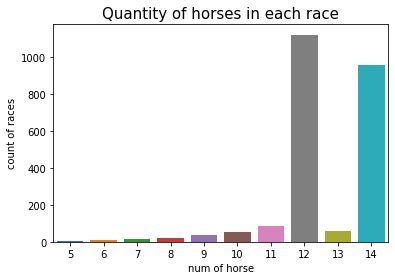

In [19]:
sns.countplot(df.groupby('race_id').max()['horse_number'])
plt.title('Quantity of horses in each race', fontsize= 15)
plt.xlabel('num of horse')
plt.ylabel('count of races')

Text(0.5, 1.0, 'The number of appears of a horse number')

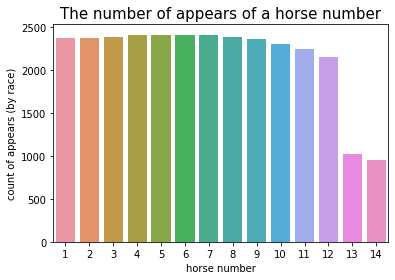

In [20]:
sns.countplot(df['horse_number'])
plt.xlabel('horse number')
plt.ylabel('count of appears (by race)')

plt.title('The number of appears of a horse number', fontsize= 15)

## Handicap System
Hong Kong horse racing use handicap system: horse no.1 has the highest rating and carry the heaviest weight

Text(0, 0.5, 'avg weight carried')

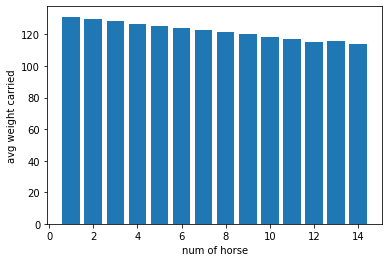

In [21]:
weight_by_horse_no= df.groupby('horse_number').mean()
plt.bar(df['horse_number'].sort_values().unique() ,  weight_by_horse_no['actual_weight'])
plt.xlabel('num of horse')
plt.ylabel('avg weight carried')

## Gate number effect (draw)
The gate number for each horse is drawn 2 days before the races. Gate number 1 is the closest to the inside rail. Thus, we would expect better performance for horses with draw no.1 . (There is a single row where draw = 15, which is because of the gate didn't function well that day).

**Note-** The odds are represented in the opposite way, as explained before.

Text(0, 0.5, 'win odds')

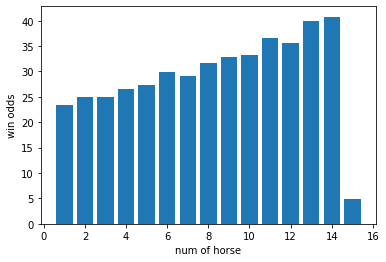

In [22]:
plt.bar(df['draw'].sort_values().unique() ,  df.groupby('draw').mean()['win_odds'])
plt.xlabel('num of horse')
plt.ylabel('win odds')

# Classifying
**We will divide the finishing position by categorization as is common in horse racing bets:**
* 1- five first positions: Whoever guesses them usually wins a sum of money, depending on the order of choice and the right number of horses selected
* 2- the other positions

In [23]:
df['first_three'] = 0
df.loc[df['finishing_position']<=5,'first_five']=1
df.loc[df['finishing_position']>5,'first_five']=2

df

,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,running_position_1,running_position_2,running_position_3,finish_time,win_odds,race_id,first_three,first_five
0,1,1,DOUBLE DRAGON,K019,B Prebble,D Cruz,133.0,1032.000000,1,-,1,2,2,1.22.33,3.800000,2014-001,0,1.0
1,2,2,PLAIN BLUE BANNER,S070,D Whyte,D E Ferraris,133.0,1075.000000,13,2,8,9,9,1.22.65,8.000000,2014-001,0,1.0
2,3,10,GOLDWEAVER,P072,Y T Cheng,Y S Tsui,121.0,1065.000000,3,2,2,1,1,1.22.66,5.700000,2014-001,0,1.0
3,4,3,SUPREME PROFIT,P230,J Moreira,C S Shum,132.0,1222.000000,2,2,6,4,5,1.22.66,6.100000,2014-001,0,1.0
4,5,7,THE ONLY KID,H173,Z Purton,K W Lui,125.0,1136.000000,9,4-1/4,9,10,10,1.23.02,6.100000,2014-001,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30184,11,3,DOUBLE VALENTINE,A163,B Prebble,A S Cruz,127.0,1085.000000,13,9-1/4,11,11,12,1.24.58,41.000000,2016-805,0,2.0
30185,12,8,THE JOY OF GIVING,A249,W M Lai,C W Chang,122.0,1026.000000,9,13-1/2,13,13,13,1.25.26,99.000000,2016-805,0,2.0
30186,13,5,MIGHTY BOY,A352,N Callan,J Moore,126.0,1153.000000,1,14-1/4,5,5,4,1.25.35,41.000000,2016-805,0,2.0
30187,13,9,WINSTON'S LAD,T348,N Callan,K W Lui,127.0,1109.108223,6,---,5,5,4,---,30.255274,2016-805,0,2.0


# Distribution of Final Positions
* before the dividing:

Text(0.5, 0, 'final position')

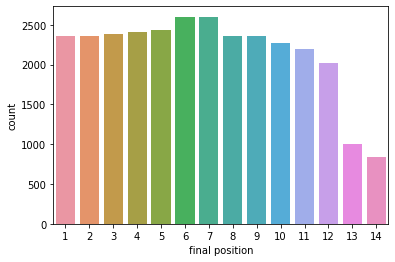

In [66]:
sns.countplot(df['finishing_position'])
plt.xlabel('final position')

* after the dividing:

Text(0.5, 0, 'categorie of final position')

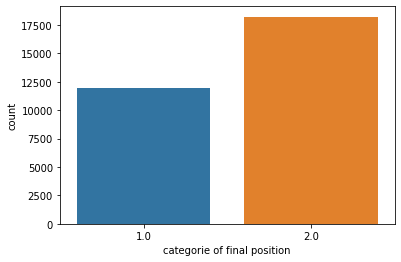

In [25]:
sns.countplot(df['first_five'])
plt.xlabel('categorie of final position')


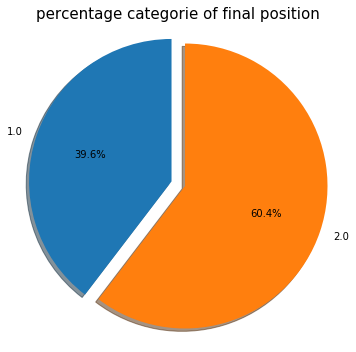

In [26]:
labels =df['first_five'].sort_values().unique()
sizes = []
for label in labels:
    sizes.append(df[df['first_five']==label].shape[0])
 
fig1, ax1 = plt.subplots(figsize=(5, 5))
explode = (0,0.1 )
ax1.pie(sizes, labels=labels,  explode=explode,autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal') 
ax1.set_title('percentage categorie of final position',fontsize=15)
fig1.tight_layout()

# Correlation
We will see the potentials relationship between the features before we select them for machine learning models.

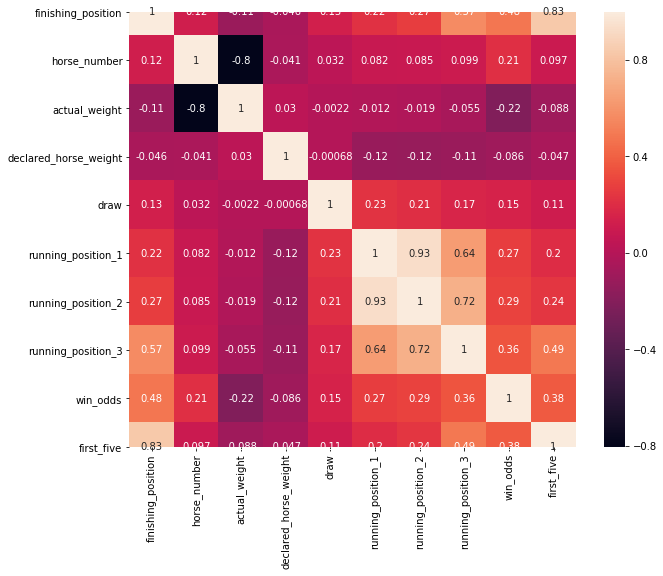

In [68]:
corr = df[['finishing_position','horse_number','actual_weight','declared_horse_weight','draw',
           'running_position_1','running_position_2','running_position_3','win_odds','first_five']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)

In [69]:
X = df[['draw','running_position_1','running_position_2','running_position_3','win_odds',]]
Y = df['first_five']


# KNN
we will show the max knn scores and a plot for all knn in range (1,30)


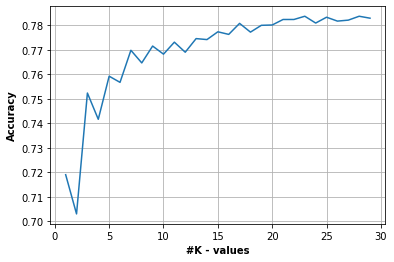

Max K scores: 23
Max knn Accuracy : 0.7837837837837838 

Max Knn Matrix:
[[2033  929]
 [ 703 3883]] 

Classification Report:
              precision    recall  f1-score   support

         1.0       0.74      0.69      0.71      2962
         2.0       0.81      0.85      0.83      4586

    accuracy                           0.78      7548
   macro avg       0.77      0.77      0.77      7548
weighted avg       0.78      0.78      0.78      7548



In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)
score_list=[]
max_score=0
max_k=0
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    score_list.append(knn.score(X_test,y_test))
    if(knn.score(X_test,y_test)>max_score):
            max_score=knn.score(X_test,y_test)
            max_k=i
    
    
plt.plot(range(1,30),score_list)
plt.xlabel('#K - values', fontweight="bold")
plt.ylabel('Accuracy', fontweight="bold")
plt.grid()
plt.show()

knn=KNeighborsClassifier(n_neighbors=max_k)
knn.fit(X_train,y_train)
print('Max K scores:', max_k)
print('Max knn Accuracy :',knn.score(X_test,y_test),"\n")

y_pred = knn.predict(X_test)

print("Max Knn Matrix:")
print( confusion_matrix(y_test,y_pred),"\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

## KFold and Cross Validation with KNN

In [71]:
kf = KFold(n_splits=5,shuffle=True)
cv_scores = cross_val_score(knn,X_train,y_train,cv=kf)
print("Cross Validation Scores:", cv_scores)
print("Cross Validation Scores Mean:", cv_scores.mean(),"\n")

for train_index, test_index in kf.split(X):
    X_train, X_test =  X[X.index.isin(train_index)], X[X.index.isin(test_index)]
    y_train, y_test = Y[Y.index.isin(train_index)], Y[Y.index.isin(test_index)]
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('classification report:')
    print(classification_report(y_test,y_pred))
    print("KFold Matrix:")
    print (confusion_matrix(y_test, y_pred),"\n")

Cross Validation Scores: [0.7807463  0.79019435 0.78798587 0.78776502 0.78202297]
Cross Validation Scores Mean: 0.7857428998983387 

classification report:
              precision    recall  f1-score   support

         1.0       0.75      0.68      0.72      2416
         2.0       0.80      0.85      0.82      3622

    accuracy                           0.78      6038
   macro avg       0.78      0.77      0.77      6038
weighted avg       0.78      0.78      0.78      6038

KFold Matrix:
[[1649  767]
 [ 542 3080]] 

classification report:
              precision    recall  f1-score   support

         1.0       0.75      0.70      0.72      2387
         2.0       0.81      0.85      0.83      3651

    accuracy                           0.79      6038
   macro avg       0.78      0.77      0.78      6038
weighted avg       0.79      0.79      0.79      6038

KFold Matrix:
[[1662  725]
 [ 555 3096]] 

classification report:
              precision    recall  f1-score   support

   

# Logistic Regression 

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)
lgr=LogisticRegression()
lgr.fit(X_train,y_train)
print('Logistic Regression Accuracy :', lgr.score(X_test,y_test),"\n")

y_pred = lgr.predict(X_test)

print("Logistic Regression Matrix:")
print( confusion_matrix(y_test,y_pred),"\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy : 0.7655007949125596 

Logistic Regression Matrix:
[[2093  904]
 [ 866 3685]] 

Classification Report:
              precision    recall  f1-score   support

         1.0       0.71      0.70      0.70      2997
         2.0       0.80      0.81      0.81      4551

    accuracy                           0.77      7548
   macro avg       0.76      0.75      0.75      7548
weighted avg       0.77      0.77      0.77      7548



# Gaussian Naive Bayes

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)
nb=GaussianNB()
nb.fit(X_train,y_train)
print('Naive Bayes Accuracy : ', nb.score(X_test,y_test),"\n")

y_pred = nb.predict(X_test)
print("Naive Bayes Matrix:")
print( confusion_matrix(y_test,y_pred),"\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Naive Bayes Accuracy :  0.7111817700052994 

Naive Bayes Matrix:
[[2310  747]
 [1433 3058]] 

Classification Report:
              precision    recall  f1-score   support

         1.0       0.62      0.76      0.68      3057
         2.0       0.80      0.68      0.74      4491

    accuracy                           0.71      7548
   macro avg       0.71      0.72      0.71      7548
weighted avg       0.73      0.71      0.71      7548



# Decision Tree

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)
dt=DecisionTreeClassifier(max_depth=4)
dt.fit(X_train,y_train)
print('Decision Tree Accuracy : ', dt.score(X_test,y_test),"\n")

y_pred = dt.predict(X_test)

print("Decision Tree Matrix:")
print(confusion_matrix(y_test,y_pred),"\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy :  0.8007419183889772 

Decision Tree Matrix:
[[1996  882]
 [ 622 4048]] 

Classification Report:
              precision    recall  f1-score   support

         1.0       0.76      0.69      0.73      2878
         2.0       0.82      0.87      0.84      4670

    accuracy                           0.80      7548
   macro avg       0.79      0.78      0.78      7548
weighted avg       0.80      0.80      0.80      7548



# Ramdom Forest 


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)
randF = RandomForestClassifier(max_depth=3, random_state=42)
randF.fit(X_train, y_train)
print('Random Forest Accuracy : ', randF.score(X_test,y_test),"\n")

y_pred = randF.predict(X_test)

print("Random Forest Matrix:")
print(confusion_matrix(y_test,y_pred),"\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Random Forest Accuracy :  0.7934552199258081 

Random Forest Matrix:
[[2000 1004]
 [ 555 3989]] 

Classification Report:
              precision    recall  f1-score   support

         1.0       0.78      0.67      0.72      3004
         2.0       0.80      0.88      0.84      4544

    accuracy                           0.79      7548
   macro avg       0.79      0.77      0.78      7548
weighted avg       0.79      0.79      0.79      7548



# SVM

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

svm= SVC()
svm.fit(X_train, y_train)
print('Support Vector : ', svm.score(X_test,y_test),"\n")

y_pred = svm.predict(X_test)

print("Support Vector Matrix:")
print(confusion_matrix(y_test,y_pred),"\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

kf = KFold(n_splits=5,shuffle=True)
cv_scores = cross_val_score(svm,X_train,y_train,cv=kf)
print("Cross Validation Scores:", cv_scores)
print("Cross Validation Scores Mean:", cv_scores.mean(),"\n")

Support Vector :  0.789613142554319 

Support Vector Matrix:
[[1976  972]
 [ 616 3984]] 

Classification Report:
              precision    recall  f1-score   support

         1.0       0.76      0.67      0.71      2948
         2.0       0.80      0.87      0.83      4600

    accuracy                           0.79      7548
   macro avg       0.78      0.77      0.77      7548
weighted avg       0.79      0.79      0.79      7548

Cross Validation Scores: [0.79178627 0.78003534 0.77826855 0.79350707 0.78577739]
Cross Validation Scores Mean: 0.7858749211013125 

